##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**ASSIGNMENT 2 – DECISION TREES AND SUPPORT VECTOR MACHINES**
--------------------------------------------------------------------------------

***Team number:*** 16

---
(*In Title case, separated with commas*)
***Full names of all students in the team:*** Aryan Gupta, Mihir Kulkarni, Vaibhav Khanna, Darsh Shani

---
(*Separated by commas*)
***Id number of all students in the team:*** 2021A7PS0162H, 2021A7PS2689H, 2021A7PS2819H, 2021A7PS2171H


This assignment aims to identify the differences between three Machine Learning models.

## Required Imports

In [74]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
# removing irrelevant warnings
warnings.filterwarnings('ignore')

# ***1. Preprocess and perform exploratory data analysis of the dataset obtained***

## Loading the Dataset

In [75]:
dataset=pd.read_csv("communities.data", na_values=["?"],
               names=["state","county","community","communityname_string","fold","population","householdsize","racepctblack","racePctWhite","racePctAsian","racePctHisp","agePct12t21","agePct12t29","agePct16t24","agePct65up","numbUrban","pctUrban","medIncome","pctWWage","pctWFarmSelf","pctWInvInc","pctWSocSec","pctWPubAsst","pctWRetire","medFamInc","perCapInc","whitePerCap","blackPerCap","indianPerCap","AsianPerCap","OtherPerCap","HispPerCap","NumUnderPov","PctPopUnderPov","PctLess9thGrade","PctNotHSGrad","PctBSorMore","PctUnemployed","PctEmploy","PctEmplManu","PctEmplProfServ","PctOccupManu","PctOccupMgmtProf","MalePctDivorce","MalePctNevMarr","FemalePctDiv","TotalPctDiv","PersPerFam","PctFam2Par","PctKids2Par","PctYoungKids2Par","PctTeen2Par","PctWorkMomYoungKids","PctWorkMom","NumIlleg","PctIlleg","NumImmig","PctImmigRecent","PctImmigRec5","PctImmigRec8","PctImmigRec10","PctRecentImmig","PctRecImmig5","PctRecImmig8","PctRecImmig10","PctSpeakEnglOnly","PctNotSpeakEnglWell","PctLargHouseFam","PctLargHouseOccup","PersPerOccupHous","PersPerOwnOccHous","PersPerRentOccHous","PctPersOwnOccup","PctPersDenseHous","PctHousLess3BR","MedNumBR","HousVacant","PctHousOccup","PctHousOwnOcc","PctVacantBoarded","PctVacMore6Mos","MedYrHousBuilt","PctHousNoPhone","PctWOFullPlumb","OwnOccLowQuart","OwnOccMedVal","OwnOccHiQuart","RentLowQ","RentMedian","RentHighQ","MedRent","MedRentPctHousInc","MedOwnCostPctInc","MedOwnCostPctIncNoMtg","NumInShelters","NumStreet","PctForeignBorn","PctBornSameState","PctSameHouse85","PctSameCity85","PctSameState85","LemasSwornFT","LemasSwFTPerPop","LemasSwFTFieldOps","LemasSwFTFieldPerPop","LemasTotalReq","LemasTotReqPerPop","PolicReqPerOffic","PolicPerPop","RacialMatchCommPol","PctPolicWhite","PctPolicBlack","PctPolicHisp","PctPolicAsian","PctPolicMinor","OfficAssgnDrugUnits","NumKindsDrugsSeiz","PolicAveOTWorked","LandArea","PopDens","PctUsePubTrans","PolicCars","PolicOperBudg","LemasPctPolicOnPatr","LemasGangUnitDeploy","LemasPctOfficDrugUn","PolicBudgPerPop","ViolentCrimesPerPop"])
dataset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 128 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    state                  1994 non-null   int64  
 1    county                 820 non-null    float64
 2    community              817 non-null    float64
 3    communityname_string   1994 non-null   object 
 4    fold                   1994 non-null   int64  
 5    population             1994 non-null   float64
 6    householdsize          1994 non-null   float64
 7    racepctblack           1994 non-null   float64
 8    racePctWhite           1994 non-null   float64
 9    racePctAsian           1994 non-null   float64
 10   racePctHisp            1994 non-null   float64
 11   agePct12t21            1994 non-null   float64
 12   agePct12t29            1994 non-null   float64
 13   agePct16t24            1994 non-null   float64
 14   agePct65up             1994 non-null  

## Drop Non-Predictive Columns
As mentioned in data description

In [76]:
dataset.drop(["state", "fold", "county", "community", "communityname_string"], axis=1, inplace=True)

## Checking Null/Missing Data

In [77]:
dataset.isna().sum()[dataset.isna().sum()!=0]

OtherPerCap                1
LemasSwornFT            1675
LemasSwFTPerPop         1675
LemasSwFTFieldOps       1675
LemasSwFTFieldPerPop    1675
LemasTotalReq           1675
LemasTotReqPerPop       1675
PolicReqPerOffic        1675
PolicPerPop             1675
RacialMatchCommPol      1675
PctPolicWhite           1675
PctPolicBlack           1675
PctPolicHisp            1675
PctPolicAsian           1675
PctPolicMinor           1675
OfficAssgnDrugUnits     1675
NumKindsDrugsSeiz       1675
PolicAveOTWorked        1675
PolicCars               1675
PolicOperBudg           1675
LemasPctPolicOnPatr     1675
LemasGangUnitDeploy     1675
PolicBudgPerPop         1675
dtype: int64

**Inference**: Columns with more than 50% Null values are useless to us, since they contain too little information for us to even fill them. Other columns are filled with their means.

### Drop Columns with more than 50% Null Values

In [78]:
dataset.drop(dataset.isna().sum()[dataset.isna().sum()>(len(dataset)//2 + 1)].index, axis=1, inplace=True)

### Fill the remaining null columns with mean

In [79]:
for col in dataset.isna().sum()[dataset.isna().sum()!=0].index:
  dataset[col].fillna(value=dataset[col].mean(skipna=True), inplace=True)

## Checking for Duplicated Data

In [80]:
dataset.duplicated().sum()

0

**Inference**: The data contains no duplications.

## Data Correlation

racepctblack           0.631264
racePctWhite          -0.684770
PctFam2Par            -0.706667
PctKids2Par           -0.738424
PctYoungKids2Par      -0.666059
PctTeen2Par           -0.661582
PctIlleg               0.737957
ViolentCrimesPerPop    1.000000
Name: ViolentCrimesPerPop, dtype: float64


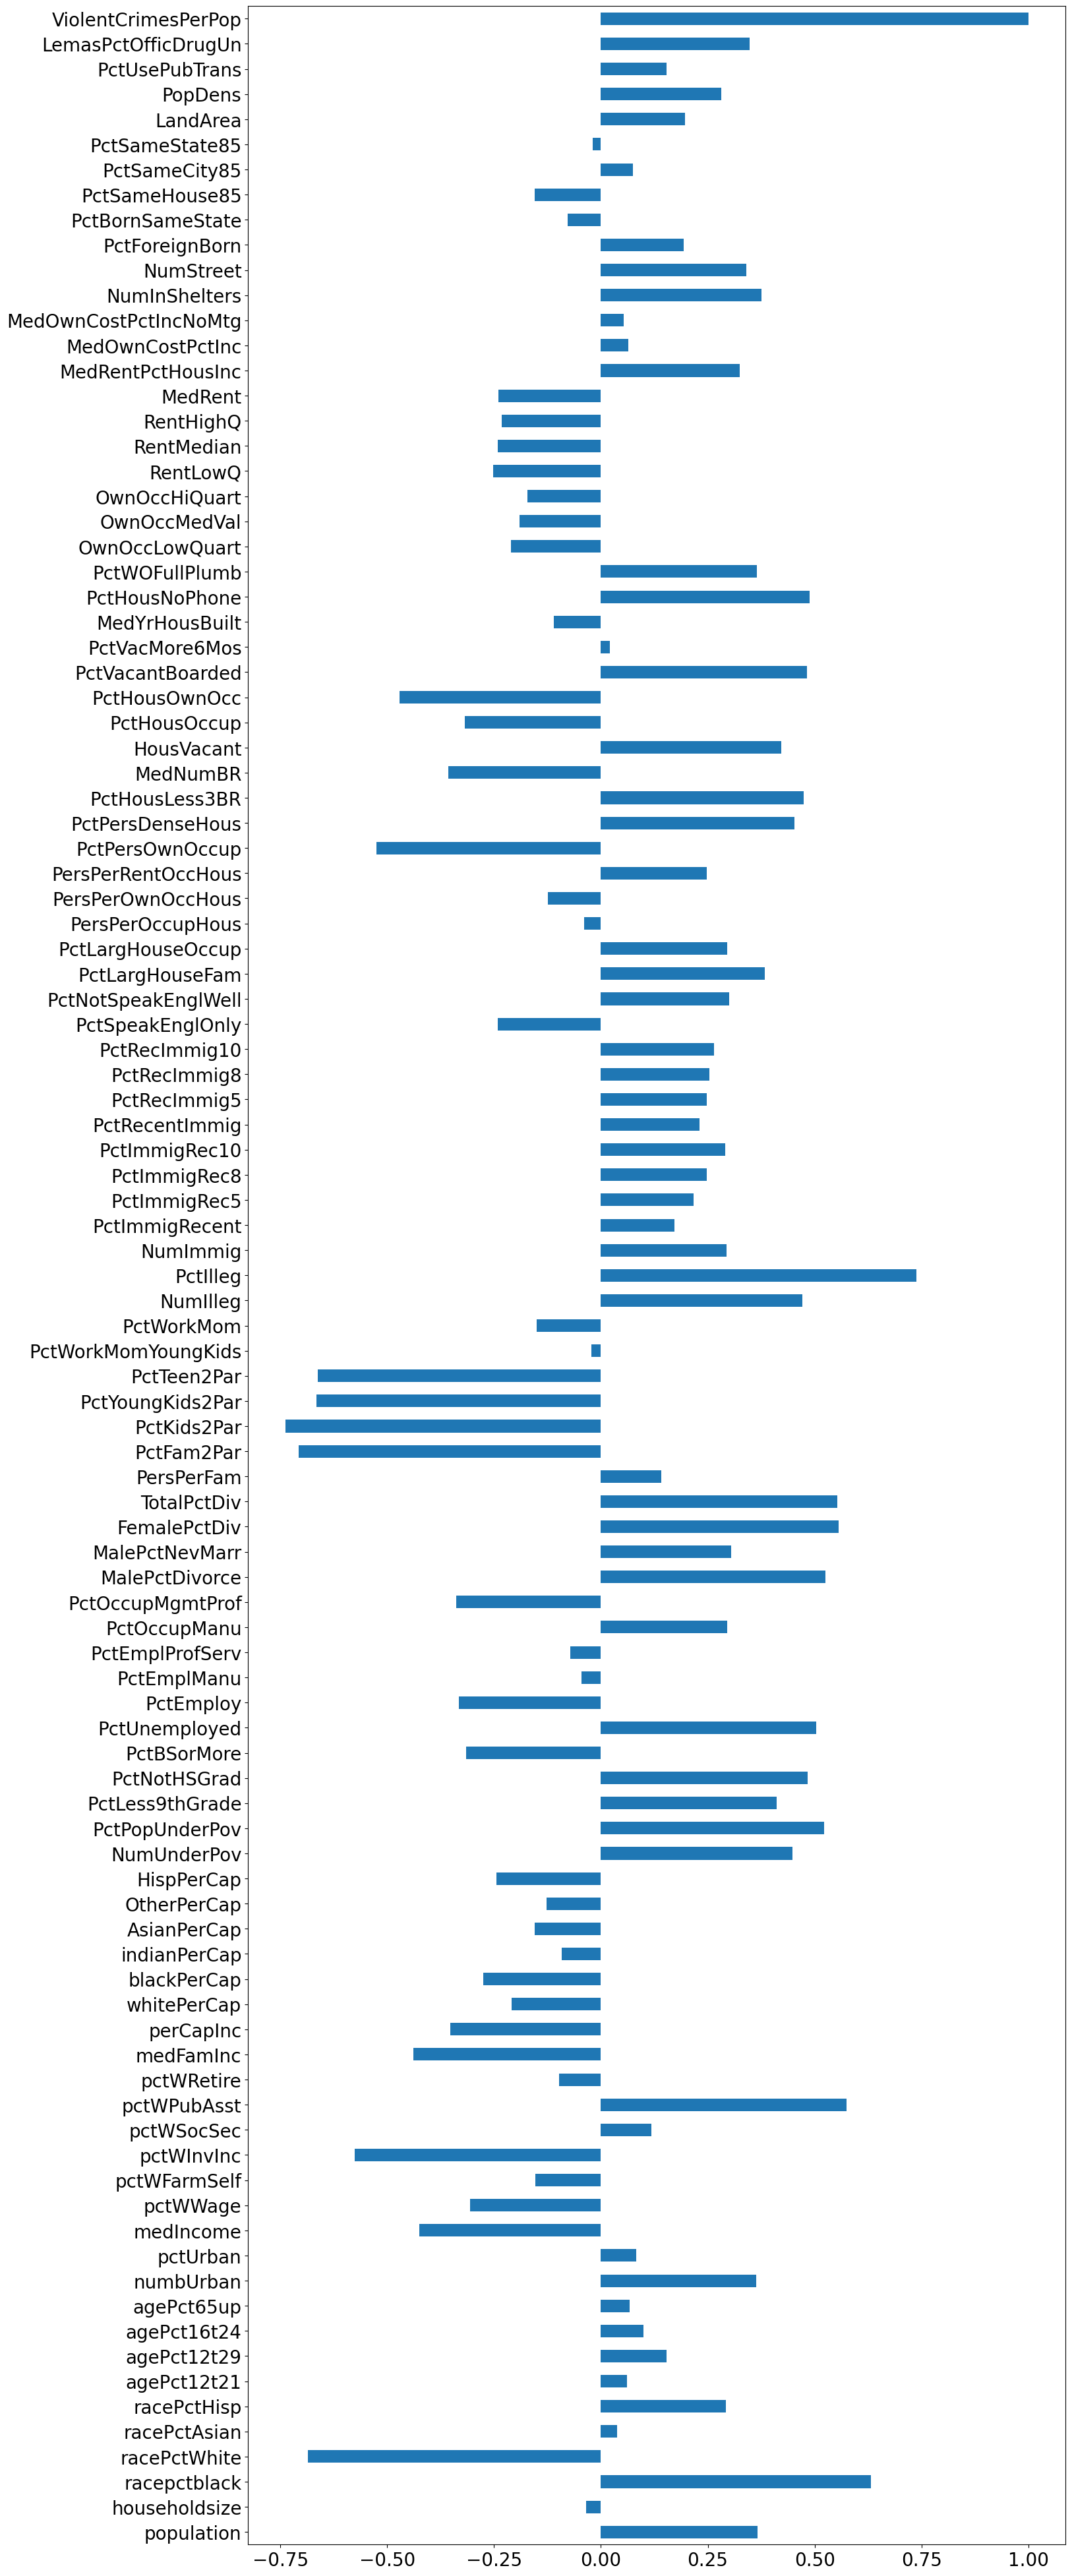

In [81]:
plt.figure(figsize = (16, 50))
corr=dataset.corr().loc["ViolentCrimesPerPop"]
corr.plot(kind="barh", fontsize=20)
# plt.figure(figsize = (16, 12))
# corr.iloc[50:].plot(kind="barh", fontsize=15)
print(corr[np.abs(corr) > 0.6])

**Inference**: We can see the features most highly correlated with the data are *racepctblack*, *racePctWhite*, *PctFam2Par*, *PctKids2Par*, *PctYoungKids2Par*, *PctTeen2Par*, *PctIlleg* (Absolute correlation greater than 60%).

## Standardizing data

This is required for dimensionality reduction using PCA and better models.

In [82]:
def standardize(data: pd.DataFrame, skip: str|None = None) -> None:
  for col in data.columns:
    if skip != col:
      # standardizing data
      data[col] = (data[col] - data[col].mean())/data[col].std()
standardize(dataset, "ViolentCrimesPerPop")
dataset.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,1.043350,-0.814793,-0.629844,0.599427,-0.161248,0.111737,-0.542654,-0.166244,-0.277853,-0.575741,...,-0.413403,-0.924451,-0.193271,-0.580608,-0.058165,0.500363,0.133666,0.167274,0.940163,0.20
1,-0.453823,-1.853172,-0.235276,-0.056205,1.418626,-0.318386,-1.058133,0.669623,0.082497,-0.854782,...,-0.024019,-0.532924,-1.075534,-0.131778,-0.663550,-0.413220,-0.555677,1.258716,-0.391349,0.67
2,-0.453823,-0.265063,1.224624,-0.793790,0.078127,-0.447423,-0.220481,-0.166244,-0.337911,-0.575741,...,-0.326874,-0.581865,0.027294,0.217312,-0.461755,-0.504578,-0.112528,-0.618564,-0.391349,0.43
3,-0.138629,1.872776,3.236918,-2.760686,-0.161248,-0.189349,0.552737,0.042723,0.022439,-1.189630,...,-0.110549,-1.511740,1.074981,0.067702,-0.007717,-0.413220,0.773770,0.516536,-0.391349,0.12
4,-0.375024,0.528992,-0.629844,0.804312,-0.304873,-0.404411,-0.284915,-0.793144,-0.638204,-0.352509,...,-0.456668,0.543773,0.578708,-0.081908,-0.613101,-0.230503,-0.703394,-0.618564,-0.391349,0.03


## Discretizing Target

In [83]:
dataset["ViolentCrimesPerPop"]=pd.cut(dataset["ViolentCrimesPerPop"], 3, labels=["low", "medium", "high"])
dataset["ViolentCrimesPerPop"].astype(str)
dataset.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,1.043350,-0.814793,-0.629844,0.599427,-0.161248,0.111737,-0.542654,-0.166244,-0.277853,-0.575741,...,-0.413403,-0.924451,-0.193271,-0.580608,-0.058165,0.500363,0.133666,0.167274,0.940163,low
1,-0.453823,-1.853172,-0.235276,-0.056205,1.418626,-0.318386,-1.058133,0.669623,0.082497,-0.854782,...,-0.024019,-0.532924,-1.075534,-0.131778,-0.663550,-0.413220,-0.555677,1.258716,-0.391349,high
2,-0.453823,-0.265063,1.224624,-0.793790,0.078127,-0.447423,-0.220481,-0.166244,-0.337911,-0.575741,...,-0.326874,-0.581865,0.027294,0.217312,-0.461755,-0.504578,-0.112528,-0.618564,-0.391349,medium
3,-0.138629,1.872776,3.236918,-2.760686,-0.161248,-0.189349,0.552737,0.042723,0.022439,-1.189630,...,-0.110549,-1.511740,1.074981,0.067702,-0.007717,-0.413220,0.773770,0.516536,-0.391349,low
4,-0.375024,0.528992,-0.629844,0.804312,-0.304873,-0.404411,-0.284915,-0.793144,-0.638204,-0.352509,...,-0.456668,0.543773,0.578708,-0.081908,-0.613101,-0.230503,-0.703394,-0.618564,-0.391349,low


## Save Preprocessed Dataset

In [84]:
dataset.to_csv("preprocessed.csv", index=False)

## Dimensionality Reduction

We use Principal Component Analysis (PCA) to reduce the dimensions of our data

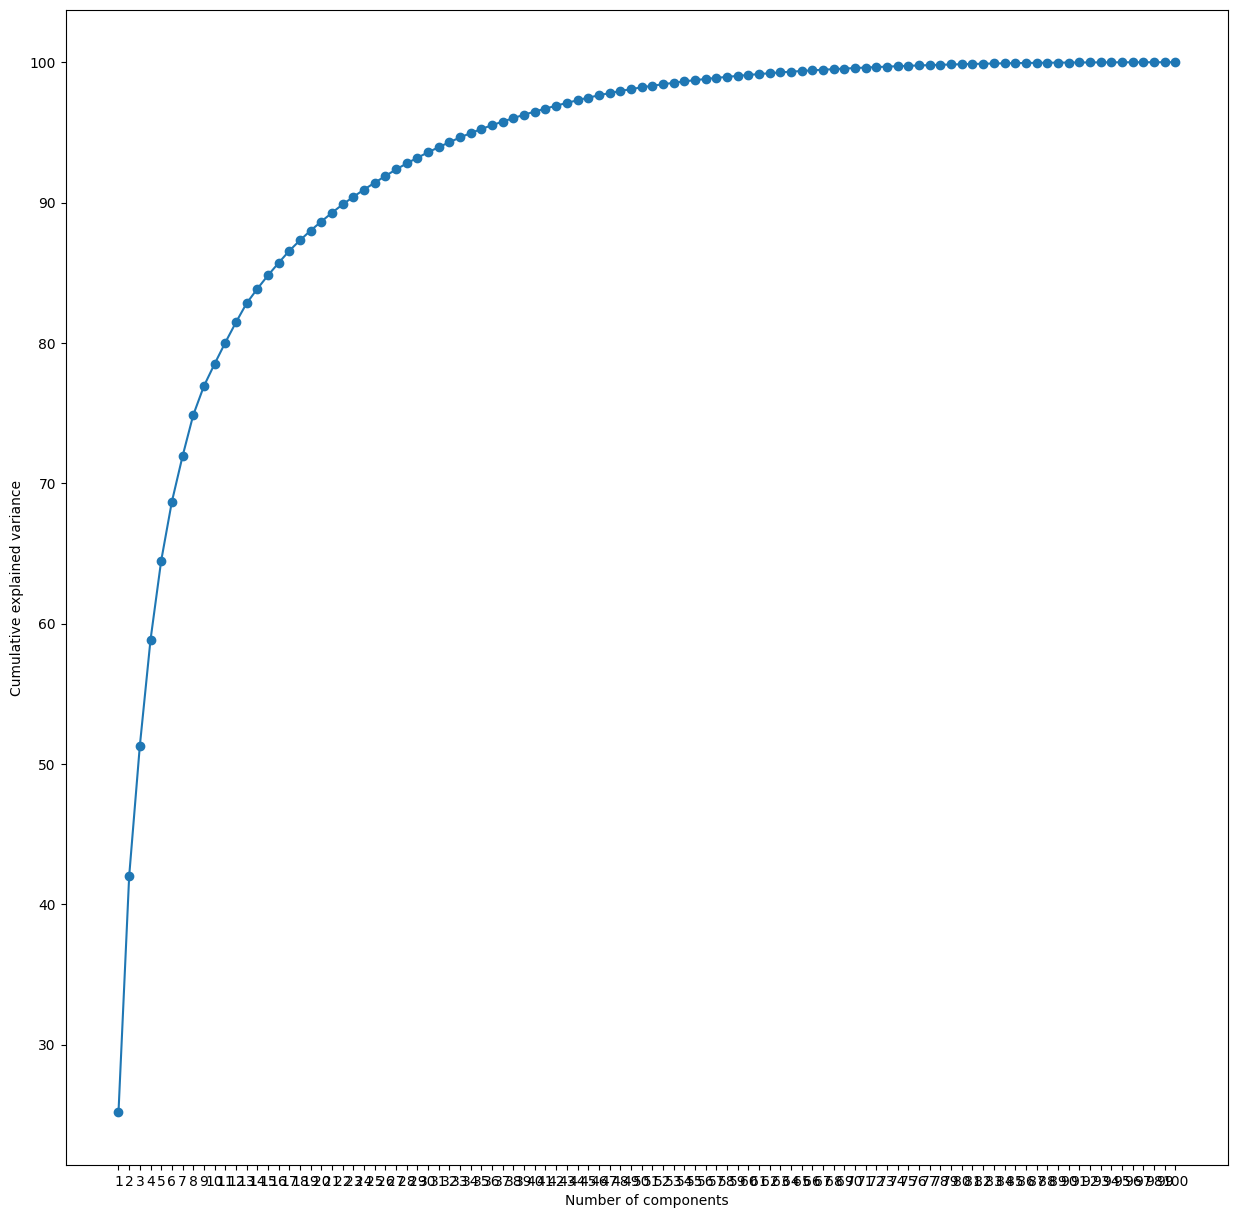

array([[ 7.75649842e-02,  5.49324398e-01, -8.63273082e-01, ...,
         3.26289543e+00, -1.02536197e+00,  1.35118061e+00],
       [-5.35429738e-01, -7.97797399e-02, -9.06507809e-01, ...,
         4.29562363e+00,  5.12855949e-01, -1.42729639e+00],
       [-6.53797503e-01, -1.46970766e+00,  1.18428698e+00, ...,
        -2.41667763e-01, -2.42457594e+00, -2.12267960e+00],
       ...,
       [-1.25330577e-01,  1.35287250e+00,  3.82129521e-01, ...,
         9.92772894e-01,  1.69026994e-01, -3.27592661e+00],
       [-2.24644207e-01,  5.68471863e-01,  2.34121666e-01, ...,
         1.57013009e+00,  3.41719399e+00,  1.70291405e+00],
       [-7.59525875e-03,  1.51150190e+00,  2.54175825e-02, ...,
        -3.76751904e+00,  1.01675620e+01, -3.29443061e+00]])

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# returns the reduced data which covers at least threshold variance % of the original data
# targetCol is the name of the target column
def getReducedData(data: pd.DataFrame, threshold: float, targetCol: str) -> np.ndarray:
  data2 = data.drop(targetCol, axis = 1) 
  m = data2.shape[1]
  corr = data2.corr().to_numpy()
  eig_values, eig_vectors = np.linalg.eigh(corr)
  eig_values = eig_values[::-1]
  var_tot = np.sum(eig_values)

  # Plotting the Variance covered
  var_cover = [(i/var_tot)*100 for i in eig_values]

  # plotting the covered variance against the number of PCs
  plt.figure(figsize=(15, 15))
  plt.plot(np.arange(1, m+1), np.cumsum(var_cover), '-o')
  plt.xticks(np.arange(1, m+1))
  plt.xlabel('Number of components')
  plt.ylabel('Cumulative explained variance');
  plt.show()

  # number of PCs
  idx = 0
  # variance_covered by the PCs
  var_cover = 0
  threshold *= var_tot
  while var_cover < threshold:
    var_cover += eig_values[idx]
    idx+=1
  # eig_vectors[:, i] represents ith eigenvector
  return data2.to_numpy() @ eig_vectors[:, -idx:]
dataset = pd.read_csv("preprocessed.csv")
Y = dataset["ViolentCrimesPerPop"].to_numpy()
X = getReducedData(dataset, 0.85, "ViolentCrimesPerPop")
X

**Inference**: We see diminishing returns after covering 85% of total variance (15 Principal Components). Thus we choose this number for our data going forward

## Test Train Split Function

In [86]:
def test_train_split(X: np.ndarray, Y: np.ndarray, test_size = 0.25, random_state = 0) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
  np.random.seed(random_state)
  # shuffle indices
  indices = np.random.permutation(len(X)).tolist()
  test_size = int(X.shape[0]*test_size)

  # separating test-train indices
  test_indices = indices[:test_size]
  train_indices = indices[test_size:]
  return np.take(X, test_indices, axis = 0), np.take(Y, test_indices, axis = 0), np.take(X, train_indices, axis = 0), np.take(Y, train_indices, axis = 0)

X_test, Y_test, X_train, Y_train = test_train_split(X, Y)

## Accuracy Function

In [87]:
def accuracy(y_true, y_pred):   
  return np.average(y_true == y_pred)

# ***2. Decision tree model with entropy implementation***

## **_2.1 Implementation of the Model_**

### Defining Decision Tree Class

In [88]:
from collections import Counter

class TreeNode:
  def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
    self.feature = feature
    self.threshold = threshold
    self.left = left
    self.right = right
    self.value = value

class DecisionTree:
  # min samples to split
  def __init__(self, max_depth=100, min_samples=2):
    self.max_depth = max_depth
    self.min_samples = min_samples
    self.tree = None

  def fit(self, X_train: np.ndarray, Y_train: np.ndarray):
    self.tree = self.grow_tree(X_train, Y_train)

  def predict(self, X_test: np.ndarray):
    return np.array([self.traverse_tree(row, self.tree) for row in X_test])

  def best_split(self, X: np.ndarray, y: np.ndarray):
    best_feature: int|None = None
    best_threshold: float|None = None
    best_gain = -1

    # go through all features and find the split with the best gain - at each decision node
    for i in range(X.shape[1]):
      thresholds = np.unique(X[:, i])
      for threshold in thresholds:
        gain = self.split_gain(X[:, i], y, threshold)
        if gain > best_gain:
          best_gain = gain
          best_feature = i
          best_threshold = threshold
    return best_feature, best_threshold

  def split_gain(self, X_column, y, threshold):
    # define a impurity finding function
    def impurity(samples: np.ndarray) -> float:
      _, counts = np.unique(samples, return_counts=True)
      probs = counts / len(samples)
      # consider the entropy as the impurity measure
      return -np.sum([p * np.log2(p) for p in probs if p > 0])

    n = len(y)
    parent_imp = impurity(y)

    left_indexes = np.argwhere(X_column <= threshold).flatten()
    right_indexes = np.argwhere(X_column > threshold).flatten()

    # if only one child is formed, there is no split
    if len(left_indexes) == 0 or len(right_indexes) == 0:
      return 0
    # take child's impurity's weighted average across the two way split
    child_imp = (len(left_indexes) / n) * impurity(y[left_indexes]) + (len(right_indexes) / n) * impurity(y[right_indexes])

    return parent_imp - child_imp

  def grow_tree(self, X, y, depth=0):
    n_samples, m_features = X.shape
    k_labels = len(np.unique(y))

    # stopping condition
    if n_samples <= self.min_samples or depth >= self.max_depth or k_labels == 1:
      # make the most common label the label of the leaf
      return TreeNode(value = Counter(y).most_common(1)[0][0])

    best_feature, best_threshold = self.best_split(X, y)

    left_indexes = np.argwhere(X[:, best_feature] <= best_threshold).flatten()
    right_indexes = np.argwhere(X[:, best_feature] > best_threshold).flatten()

    if len(left_indexes) == 0 or len(right_indexes) == 0:
      return TreeNode(value = Counter(y).most_common(1)[0][0])

    # build the tree on both children with remaining samples
    left = self.grow_tree(X[left_indexes, :], y[left_indexes], depth+1)
    right = self.grow_tree(X[right_indexes, :], y[right_indexes], depth+1)

    # return the current node
    return TreeNode(best_feature, best_threshold, left, right)

  def traverse_tree(self, x: np.ndarray, tree: list[TreeNode]):
    # return the value of the node if we reach a leaf
    if tree.value is not None:
      return tree.value
    # else continue travers
    if x[tree.feature] <= tree.threshold:
      return self.traverse_tree(x, tree.left)
    return self.traverse_tree(x, tree.right)


### DT Accuracy function

In [89]:
def getDTAcc(depth: int, min_samples: int) -> float:
  acc = 0
  folds = 1
  dt = DecisionTree(depth, min_samples)
  for i in range(folds):
    X_test, Y_test, X_train, Y_train = test_train_split(X, Y, random_state=i)
    dt.fit(X_train, Y_train)
    Y_pred = dt.predict(X_test)
    acc += accuracy(Y_test, Y_pred)
  return acc/folds

## **_2.2 Insights drawn (plots, markdown explanations)_**

### Change in Accuracy with Depth

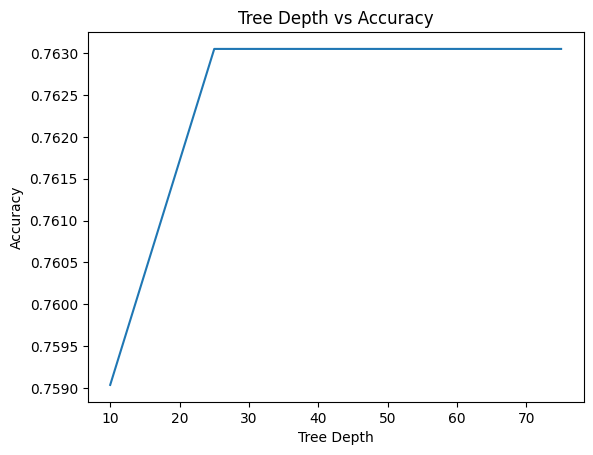

In [90]:
acc = []
r = [10, 25, 50, 75]
for d in r:
  acc.append(getDTAcc(d, 20))
plt.plot(r, acc)
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Tree Depth vs Accuracy")
plt.show()

**Inference**: Increasing Tree depth beyond 25 yields diminishing returns.

### Change in Accuracy with Minimum Samples for Splitting

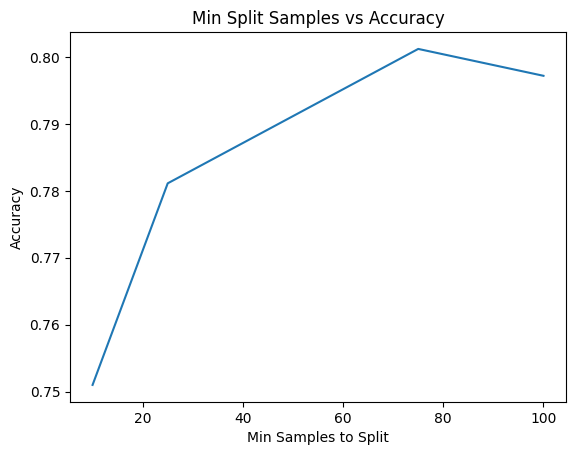

In [91]:
r = [10, 25, 50, 75, 100]
acc = []
for ms in r:
  acc.append(getDTAcc(25, ms))

plt.plot(r, acc)
plt.xlabel("Min Samples to Split")
plt.ylabel("Accuracy")
plt.title("Min Split Samples vs Accuracy")
plt.show()

**Inference**: We observe that a tree height of 25 gives the best accuracy in minimum time, similarly min samples should be 75 for the best results.

Best Accuracy Achieved: 80%

### Best Model

In [92]:
getDTAcc(25, 75)

0.8012048192771084

**Inference**: We get 80.1 % accuracy after fine-tuning our decision tree model with depth of 25 and 75 min samples.

# ***3. Adaboost***

## **_3.1 Implementation of the Model_**

### Defining AdaBoost Class

In [93]:
class AdaBoost:
  def __init__(self, n_classifiers = 100):
    self.alphas: list[float] = []
    self.trees: list[DecisionTree] = []
    self.n_classifiers = n_classifiers

  def fit(self, X: np.ndarray, y: np.ndarray):
    self.alphas = [] 
    train = pd.DataFrame(np.concatenate((X, y.reshape(len(y), 1)), axis=1))

    # Iterate over  weak classifiers
    for i in range(0, self.n_classifiers):
      if i == 0:
        # initialize weigths
        W_i = np.ones(len(y)) * 1 / len(y)  
      else:
        # Update weights
        W_i = W_i * np.exp(alpha_i * (np.not_equal(y, y_pred_i)).astype(int))
      
      # Model a Decision Tree Stump
      tree_i = DecisionTree(max_depth = 1)
      train2 = train.sample(len(train), replace=True, weights=W_i)
      X = train2.iloc[:, :-1].to_numpy()
      y = train2.iloc[:, -1].to_numpy()
      tree_i.fit(X, y)
      y_pred_i = tree_i.predict(X)
      
      self.trees.append(tree_i) # Save to list of weak classifiers

      # Compute error
      error_i = np.sum(W_i * (np.not_equal(y, y_pred_i)).astype(int))/np.sum(W_i)
      if error_i <= 0:
        self.n_classifiers = i+1
        self.alphas.append(1000000000)
        break
      # Compute alpha
      alpha_i = 0.5*np.log((1 - error_i) / error_i)
      self.alphas.append(alpha_i)

  def predict(self, X):
    # Initialise dataframe with weak predictions for each observation
    weak_preds = pd.DataFrame(0.0, index = range(len(X)), columns = ["low", "medium", "high"]) 

    # Predict class label for each weak classifier, weighted by alpha_m
    for i in range(self.n_classifiers):
      preds = self.trees[i].predict(X)
      for j in range(len(preds)):
        weak_preds.loc[j, preds[j]] += self.alphas[i]

    # Calculate final prediction (the column with the highest value is the predicted value)
    return weak_preds.idxmax(axis=1)

### AdaBoost Accuracy Function

In [94]:
def getABAcc(n_classifiers: int) -> float:
  acc = 0
  folds = 1
  ab = AdaBoost(n_classifiers)
  for i in range(folds):
    X_test, Y_test, X_train, Y_train = test_train_split(X, Y, random_state=i)
    ab.fit(X_train, Y_train)
    Y_pred = ab.predict(X_test)
    acc += accuracy(Y_test, Y_pred)
  return acc/folds

## **_3.2 Insights drawn (plots, markdown explanations)_**

### Change in Accuracy with Number of Classifiers

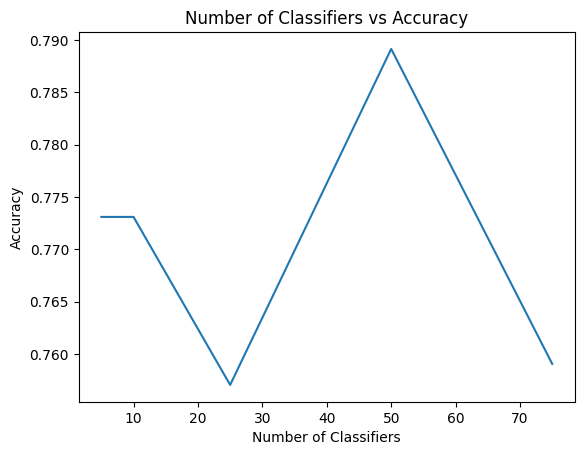

In [95]:
acc = []
r = [5, 10, 25, 50, 75]
for nc in r:
  acc.append(getABAcc(nc))
plt.plot(r, acc)
plt.xlabel("Number of Classifiers")
plt.ylabel("Accuracy")
plt.title("Number of Classifiers vs Accuracy")
plt.show()

### Best Model

In [96]:
getABAcc(50)

0.7891566265060241

**Inference**: We get the best model with 50 classifiers, acheiving 78.9% accuracy.

# **_4. Multiclass SVM_**

## **_4.1 Implementation of the Model_**

### Defining Kernels

In [97]:
def gaussian_kernel(x: np.ndarray, z: np.ndarray, sigma: float) -> np.ndarray:
  n = x.shape[0]
  m = z.shape[0]
  x2 = np.dot(np.sum(x ** 2, 1).reshape(n, 1), np.ones((1, m)))
  z2 = np.dot(np.sum(z ** 2, 1).reshape(m, 1), np.ones((1, n)))
  return np.exp(-(x2 + z2.T - 2 * np.dot(x, z.T)) / (2 * sigma ** 2))

def linear_kernel(x: np.ndarray, z: np.ndarray) -> np.ndarray:
  return np.matmul(x, z.T)

### Defining SVM Class

In [98]:
from typing import Callable
import cvxopt
from collections import Counter
"""
We use one vs rest method for multi-class classification (number of classes - 1 svms are built).

cvxopt.solvers.qp solves the following problem:
minimize (1/2)*x.T*P*x + q.T*x
subject to       G*x <= h
                 A*x = b
(x is returned as the solution if optimal solution exists)

we have the svm inequalities:
maximize (alpha - (0.5)*alpha.T*(y*y.T*K)*alpha
subject to       y.T*alpha = 0
                 0 <= alpha_i <= C
(this includes the KKT conditions and the dual problem to find alpha, K is the gram matrix)

we convert this into the proper form by setting:
x = alpha
P = y*y.T*K
q = -1.T
A = y.T
b = 0
G = [[-I],
     [ I]]
h = [[0],
     [C]]
where 1 is the matrix of ones and I is the identity matrix

"""

class SVM:
  def __init__(self, kernel: Callable[[np.ndarray, np.ndarray], np.ndarray], C = 1.0, E_tolerance = 0.001) -> None:
    self.kernel = kernel
    # regularization parameter
    self.C = C
    self.E_toler = E_tolerance
    # number of classes
    self.k_classes = 0
    # store class label to integer encoding
    self.labels = []
    # list of classifiers for multi class
    self.classifiers = []
    # to store support vectors
    self.alphas = []
    self.is_sv = None
    self.margin_sv = None
    self.X = None
    self.Y = None
    self.kerneled_matrix = None
    self.mc = None
  
  # requires y values to be 1 or -1
  def binary_fit(self, X_train: np.ndarray, Y_train: np.ndarray) -> None:
    # if more than two unique classes, call the multiclass version
    if len(np.unique(Y_train)) > 2: return self.fit(X_train, Y_train)
    
    # change dimensions of y to Nx1
    self.Y = Y_train.reshape(-1, 1).astype(np.double)
    self.X = X_train
    n_samples, m_features = X_train.shape

    # Compute the kernel of training features
    if self.kerneled_matrix is None:
      self.kerneled_matrix = self.kernel(X_train, X_train)
    
    ### Set up optimization parameters
    # For (1/2)*x.T*P*x + q.T*x
    P = cvxopt.matrix(self.Y @ self.Y.T * self.kerneled_matrix)
    q = cvxopt.matrix(-np.ones((n_samples, 1)))
    
    # For A*x = b
    A = cvxopt.matrix(self.Y.T)
    b = cvxopt.matrix(np.zeros(1))

    # For G*x <= h
    G = cvxopt.matrix(np.concatenate((-np.identity(n_samples), np.identity(n_samples)), axis = 0))
    h = cvxopt.matrix(np.concatenate((np.zeros((n_samples,1)), np.ones((n_samples,1)) * self.C), axis = 0))

    # Solve
    # do not print progress info
    cvxopt.solvers.options['show_progress'] = False
    sol = cvxopt.solvers.qp(P, q, G, h, A, b)
    self.alphas = np.array(sol["x"])            # our solution
        
    # a Boolean array that flags points which are support vectors (map to support vectors)
    self.is_sv = ((self.alphas > self.E_toler)&(self.alphas <= self.C)).squeeze()
    self.margin_sv = np.argmax((self.E_toler < self.alphas)&(self.alphas < self.C-self.E_toler))

  # multiclass fitting
  def fit(self, X_train, Y_train):
    self.k_classes = len(np.unique(Y_train))
    self.mc = Counter(Y_train).most_common()[0][0]
    # fit a binary SVM for each class (one vs rest = k-1 svms)
    self.labels = np.unique(Y_train)
    for i in self.labels[:-1]:
      # get the data for the pair
      Xs, Ys = X_train, np.array(Y_train)
      # change the labels to -1 and 1
      Ys[Ys!=i], Ys[Ys==i] = -1, +1
      # fit the classifier
      svm = SVM(kernel=self.kernel, C=self.C, E_tolerance=self.E_toler)
      svm.binary_fit(Xs, Ys)
      # save the classifier
      self.classifiers.append(svm)
  
  def binary_predict(self, X):
    # multiclass predictions
    if self.k_classes > 2: return self.predict(X)
    # convert support vectors array into a column vector of SVs
    xs, ys = self.X[self.margin_sv, np.newaxis], self.Y[self.margin_sv]
    alphas, Y_sv, X_sv = self.alphas[self.is_sv], self.Y[self.is_sv], self.X[self.is_sv]

    b = ys - np.sum(alphas * Y_sv * self.kernel(X_sv, xs), axis=0)
    return np.sign(np.sum(alphas * Y_sv * self.kernel(X_sv, X), axis=0) + b).astype(int)

  def predict(self, X):
    # get the predictions from all classifiers
    preds = np.zeros((X.shape[0], self.k_classes-1))
    for i, classifier in enumerate(self.classifiers):
      preds[:, i] = classifier.binary_predict(X)
    # combine predictions of the k-1 classifiers
    Y_pred = []
    for pred in preds:
      if pred[0] == 1 and pred[1] == -1:
        Y_pred.append(self.labels[0])
      elif pred[0] == -1 and pred[1] == 1:
        Y_pred.append(self.labels[1])
      elif pred[0] == -1 and pred[1] == -1:
        Y_pred.append(self.labels[2])
      else:
        Y_pred.append(self.mc)
    return np.array(Y_pred)

### SVM Accuracy Funtion

In [99]:
def getSVMAcc(kernel: Callable[[np.ndarray, np.ndarray], np.ndarray], C = 1.0, E_tolerance = 0.001) -> float:
  acc = 0
  folds = 1
  svm = SVM(kernel, C, E_tolerance)
  for i in range(folds):
    X_test, Y_test, X_train, Y_train = test_train_split(X, Y, random_state=i)
    svm.fit(X_train, Y_train)
    Y_pred = svm.predict(X_test)
    acc += accuracy(Y_test, Y_pred)
  return acc/folds

## **_4.2 Insights drawn (plots, markdown explanations)_**

### Change in Accuracy with C (linear Kernel)

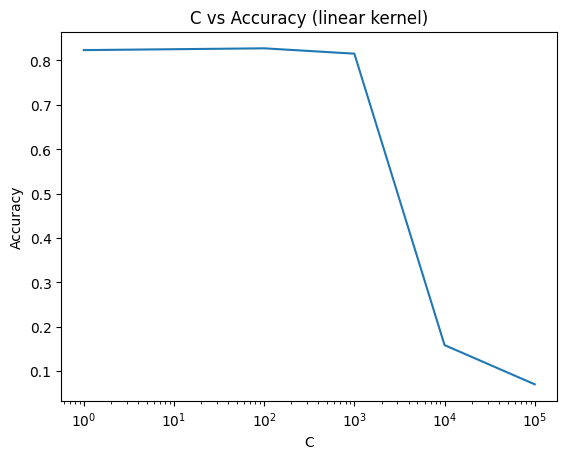

In [100]:
acc = []
r = [1, 1e1, 1e2, 1e3, 1e4, 1e5]
for c in r:
  acc.append(getSVMAcc(linear_kernel, c))
plt.plot(r, acc)
plt.xlabel("C")
plt.xscale('log')
plt.ylabel("Accuracy")
plt.title("C vs Accuracy (linear kernel)")
plt.show()

In [101]:
getSVMAcc(linear_kernel, 1e2)

0.8273092369477911

**Inference**: Linear Kernel yields the best results with c = 100, an accuracy of 82.7%

### Change in Accuracy with C (Gaussian Kernel)

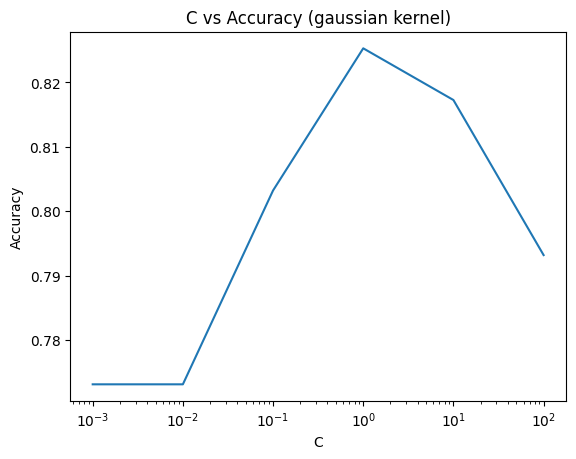

In [102]:
acc = []
r = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2]
for c in r:
  acc.append(getSVMAcc(lambda x, z: gaussian_kernel(x, z, 10), c))
plt.plot(r, acc)
plt.xlabel("C")
plt.xscale('log')
plt.ylabel("Accuracy")
plt.title("C vs Accuracy (gaussian kernel)")
plt.show()

**Inference**: We observe that c = 1 yields the best results in Gaussian Kernel

### Change in Accuracy with Sigma (Gaussian Kernel Parameter)

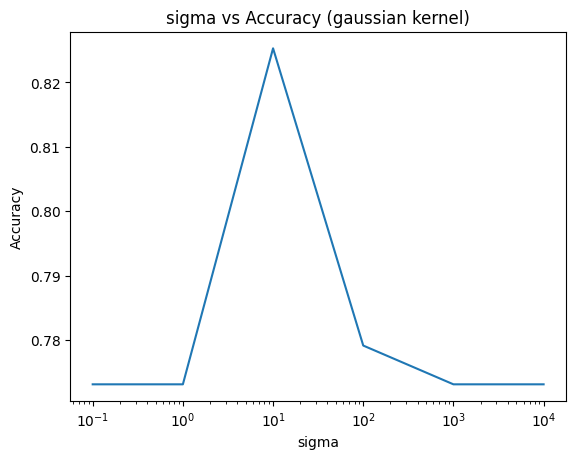

In [103]:
acc = []
r = [1e-1, 1, 1e1, 1e2, 1e3, 1e4]
for s in r:
  acc.append(getSVMAcc(lambda x, z: gaussian_kernel(x, z, s), 1))
plt.plot(r, acc)
plt.xlabel("sigma")
plt.xscale('log')
plt.ylabel("Accuracy")
plt.title("sigma vs Accuracy (gaussian kernel)")
plt.show()

**Inference**: A sigma value of 10 yields the best results with the gaussian kernel.

*NOTE*: Sigma is also called gamma in some texts

In [104]:
getSVMAcc(lambda x, z: gaussian_kernel(x, z, 10), 1)

0.8253012048192772

**Inference**: We get 82.5% accuracy after fine-tuning our SVM model with the Gaussian Kernel. Thus we conclude that linear kernel is the best for SVM with the given data.

# **_5. Conclusion_**

We observe that **_Multiclass SVM with Linear Kernel and C = 1_** work the best with the given data, giving an accuracy of **_82.7%_**.

# **_6. References_**

1. Dataset Reference
    * **Data Description**: https://archive.ics.uci.edu/dataset/183/communities+and+crime
2. Libraries
    * **numpy**: https://numpy.org/doc/stable/user/index.html
    * **pandas**: https://pandas.pydata.org/docs/getting_started/index.html#getting-started
    * **matplotlib**: https://matplotlib.org/stable/users/index
    * **seaborn**: https://seaborn.pydata.org/tutorial.html#user-guide-and-tutorial
    * **cvxopt**: https://cvxopt.org/userguide/coneprog.html#quadratic-programming
3. Decision Tree
    * https://medium.com/analytics-vidhya/decision-trees-for-dummies-a8e3c00c5e2e
4. AdaBoost
    * https://www.kdnuggets.com/2020/12/implementing-adaboost-algorithm-from-scratch.html
5. Multiclass Support Vector Machines
    * https://towardsdatascience.com/implement-multiclass-svm-from-scratch-in-python-b141e43dc084#:~:text=To%20generalize%20the%20model%20to,all%20other%20classes%20into%20%2D1.

